In [68]:
import requests
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import platform
from bs4 import BeautifulSoup
import pandas as pd

In [69]:
def parse_page(soup, df):
    for item in soup.find_all('article', class_ = 'placard'):
        url = ''
        rent = ''
        contact = ''
        #print(item)
        




        if item.find('a', class_ = 'property-link') is None:
            print('loo')
            continue
        url = item.find('a', class_ = 'property-link').get('href')
        print(url)
        #print(parse_apartment(url))

        if item.find('span', class_='js-placardTitle title') is None: 
            continue
        name = item.find('span', class_ = 'js-placardTitle title').getText().strip()
        print(name)

        obj = item.find('div', class_ = 'property-address js-url')
        if obj is not None:
            address = obj.getText().strip()
            print(address)
        
        if item.find('p', class_='property-pricing') is None: 
            continue
        rent = item.find('p', class_='property-pricing').getText().strip()
        print(rent)

        if item.find('p', class_='property-beds') is None: 
            continue
        beds = item.find('p', class_='property-beds').getText().strip()
        print(beds)

        df.loc[len(df)] = [url, name, address, rent, beds]
    

In [70]:

df = pd.DataFrame(columns = ['URL', 'Name', 'Address', 'Rent', 'Beds'])

counter = 0
URL = 'https://www.apartments.com/jacksonville-fl/max-1-bedrooms/'
web_driver = None
if(web_driver != None):
    driver = web_driver
else:
    options = Options()
    options.headless = True
    if ('debian' in platform.platform()):
        driver = webdriver.Firefox(firefox_binary='/usr/bin/firefox-esr', options=options)
    else:
        driver = webdriver.Firefox(options=options)
driver.get(URL)

    # read the current page
soup = BeautifulSoup(driver.page_source, 'html.parser')

# soupify the current page
soup.prettify()

soup = soup.find('div', class_= 'placardContainer')

parse_page(soup, df)

for pageNo in range(2,16):
    URL = 'https://www.apartments.com/jacksonville-fl/max-1-bedrooms/'+ str(pageNo) + '/'

    
    driver.get(URL)

        # read the current page
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # soupify the current page
    soup.prettify()

    soup = soup.find('div', class_= 'placardContainer')

    parse_page(soup, df)
    

https://www.apartments.com/longleaf-at-st-johns-jacksonville-fl/qcydvtw/
Longleaf at St. Johns
100 Audubon Pl, Jacksonville, FL 32259
$1,425 - $1,655
1 Bed
https://www.apartments.com/northlake-apartments-jacksonville-fl/4wf2trj/
Northlake Apartments
2445 Dunn Ave, Jacksonville, FL 32218
$1,099 - $1,550
1 Bed
https://www.apartments.com/terraces-at-town-center-jacksonville-fl/ct980jf/
Terraces at Town Center
5140 Gate Pky N, Jacksonville, FL 32256
$1,424 - $2,416
1 Bed
https://www.apartments.com/lake-lofts-at-deerwood-jacksonville-fl/m4x9b7j/
Lake Lofts at Deerwood
4360 Deerwood Lake Pky, Jacksonville, FL 32216
$1,250 - $1,535
1 Bed
https://www.apartments.com/11-east-forsyth-apartments-jacksonville-fl/flx8d1v/
11 East Forsyth Apartments
11 E Forsyth St, Jacksonville, FL 32202
$1,270 - $1,715
Studio - 1 Bed
https://www.apartments.com/the-drake-at-deerwood-jacksonville-fl/5gj5dpp/
The Drake at Deerwood
9727 Touchton Rd, Jacksonville, FL 32246
$1,300 - $1,575
1 Bed
https://www.apartments.co

In [71]:
df

,URL,Name,Address,Rent,Beds
0,https://www.apartments.com/longleaf-at-st-john...,Longleaf at St. Johns,"100 Audubon Pl, Jacksonville, FL 32259","$1,425 - $1,655",1 Bed
1,https://www.apartments.com/northlake-apartment...,Northlake Apartments,"2445 Dunn Ave, Jacksonville, FL 32218","$1,099 - $1,550",1 Bed
2,https://www.apartments.com/terraces-at-town-ce...,Terraces at Town Center,"5140 Gate Pky N, Jacksonville, FL 32256","$1,424 - $2,416",1 Bed
3,https://www.apartments.com/lake-lofts-at-deerw...,Lake Lofts at Deerwood,"4360 Deerwood Lake Pky, Jacksonville, FL 32216","$1,250 - $1,535",1 Bed
4,https://www.apartments.com/11-east-forsyth-apa...,11 East Forsyth Apartments,"11 E Forsyth St, Jacksonville, FL 32202","$1,270 - $1,715",Studio - 1 Bed
...,...,...,...,...,...
362,https://www.apartments.com/370-oakleaf-village...,370 Oakleaf Village Parkway Unit 215.353519,"370 Oakleaf Village Parkway Unit 215.353519, O...","$1,962","1 Bed, 1 Bath, 806 sq ft"
363,https://www.apartments.com/370-oakleaf-village...,370 Oakleaf Village Parkway Unit 419.536844,"370 Oakleaf Village Parkway Unit 419.536844, O...","$2,100","1 Bed, 1 Bath, 806 sq ft"
364,https://www.apartments.com/370-oakleaf-village...,370 Oakleaf Village Parkway Unit 0925.606391,"370 Oakleaf Village Parkway Unit 0925.606391, ...","$2,103","1 Bed, 1 Bath, 806 sq ft"
365,https://www.apartments.com/370-oakleaf-village...,370 Oakleaf Village Parkway Unit 0320.915028,"370 Oakleaf Village Parkway Unit 0320.915028, ...","$2,012","1 Bed, 1 Bath, 806 sq ft"


In [72]:
#df['RentMin'] = df['Rent'].apply(lambda x: x.split(' - ')[0].replace('$', '').replace(',', ''))
#df= df[df['RentMin'] != "all for Rent"]
#df['RentMin'] = df['RentMin'].astype('int64')

df['Address'] = df['Address'].apply(lambda x: x.split('Unit')[0])

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent = 'apartmentParser')

def geocode_address(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location is not None:
            return location.latitude, location.longitude
        else:
            return 'NOT FOUND'
    except GeocoderTimedOut:
        return 'TIMEOUT'
    except Exception as e:
        return f'ERROR: {e}'


df['Location'] = df['Address'].apply(lambda x: geocode_address(x))
#(df['longitude'], df['latitude']) = df['Address'].apply(lambda x: geocode_address)



In [86]:
import numpy as np

df['Latitude'] = df['Location'].apply(lambda x: float(x[0]) if x != "NOT FOUND" else np.nan)
df['Longitude'] = df['Location'].apply(lambda x: float(x[1]) if x != "NOT FOUND" else np.nan)
dfSub = df.dropna(subset=['Latitude', 'Longitude'])
dfSub = dfSub[df['Latitude'] < 32]
dfSub = dfSub[abs(df['Longitude']) < 82.2]

C:\Users\Waxli\AppData\Local\Temp\ipykernel_60236\746362279.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfSub = dfSub[df['Latitude'] < 32]
C:\Users\Waxli\AppData\Local\Temp\ipykernel_60236\746362279.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfSub = dfSub[abs(df['Longitude']) < 82.2]


In [75]:
df['Location'].unique()

array(['NOT FOUND', (30.438981067804615, -81.68567436205053),
       (30.244111938686387, -81.534059122819), (30.2670972, -81.5604021),
       (30.3274264, -81.6573139),
       (30.269710111111113, -81.56275839393939),
       (30.319997197224076, -81.5775404579613), (30.3354896, -81.5543815),
       (30.2590182, -81.5209776), (30.3274388, -81.6680286),
       (30.363143253846424, -81.4221184492229),
       (30.19315626929716, -81.7125429070163), (30.1667225, -81.5079882),
       (30.3252411, -81.4981779), (30.51939792544704, -81.64767984388783),
       (30.2893878, -81.4466119464388), (30.300189, -81.61325),
       (30.327247334639807, -81.57948626307115),
       (30.3123133, -81.4571643), (30.3078249, -81.406232),
       (30.3389902, -81.4133846),
       (30.076708449999998, -81.48626578812694),
       (30.1029737, -81.4825387), (30.3183955, -81.5507232),
       (30.2900478, -81.7105779), (30.294770749999998, -81.77650125),
       (30.2782487, -81.4369938), (30.3178764, -81.4488504),


In [104]:
from shapely.geometry import box
from matplotlib import pyplot as plt
import geopandas as gpd
import contextily as ctx
jax_bbox = gpd.GeoDataFrame({
    'geometry': [box(-81.8, 30.1, -81.3, 30.6)]
}, crs="EPSG:4326")
dfSub['geometry'] = gpd.points_from_xy(dfSub['Longitude'], dfSub['Latitude'])
dfSub = gpd.GeoDataFrame(dfSub, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

<Axes: xlabel='None', ylabel='None'>

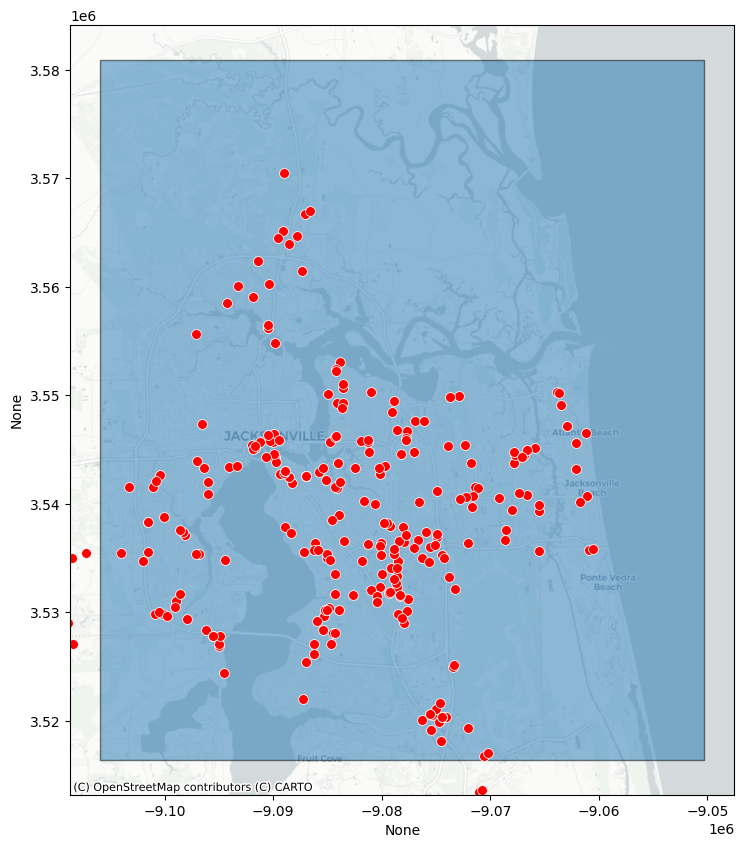

In [112]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,10))
jax_bbox.to_crs(epsg=3857).plot(ax = ax, alpha = 0.5, edgecolor = "black")
ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron)
sns.scatterplot(x=dfSub.geometry.x, y=dfSub.geometry.y, ax=ax, color='red', s=50)
#sns.scatterplot(x = dfSub['Longitude'], y =dfSub['Latitude'])

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'apartmentParser')
location = geolocator.geocode("1643 Hawkins Cove Dr E, Duval, FL, 32246")
print(location.latitude, location.longitude)

30.319869 -81.4963404
